# Exercise 6.03

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from tensorflow import random

# Load the Data
X = pd.read_csv("../data/aps_failure_training_feats.csv")
y = pd.read_csv("../data/aps_failure_training_target.csv")

In [2]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=seed)

In [3]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [4]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

np.random.seed(seed)
random.set_seed(seed)
model = Sequential()

# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
# Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 7s 180us/step - loss: 0.0863 - accuracy: 0.9832 - val_loss: 0.0384 - val_accuracy: 0.9842
Epoch 2/100
38400/38400 [==============================] - 5s 131us/step - loss: 0.0414 - accuracy: 0.9834 - val_loss: 0.0340 - val_accuracy: 0.9842
Epoch 3/100
38400/38400 [==============================] - 6s 148us/step - loss: 0.0369 - accuracy: 0.9834 - val_loss: 0.0328 - val_accuracy: 0.9842
Epoch 4/100
38400/38400 [==============================] - 5s 138us/step - loss: 0.0339 - accuracy: 0.9840 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 5/100
38400/38400 [==============================] - 5s 139us/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 0.0321 - val_accuracy: 0.9887
Epoch 6/100
38400/38400 [==============================] - 5s 133us/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 7/100
38400/38400 [==============================] 

In [6]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

## Confusion Matrix & Derived Metrics

In [7]:
from sklearn.metrics import confusion_matrix
y_pred_class1 = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_class1)
print(cm)

[[11733    55]
 [   66   146]]


In [8]:
# True Negative
TN = cm[0,0]

# False Negative
FN=cm[1,0]

# False Positives
FP = cm[0,1]

# True Positives
TP = cm[1,1]

In [9]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.6887


In [10]:
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.9953


In [11]:
# Precision
Precision = TP / (TP + FP)
print(f'Precision: {Precision:.4f}')

Precision: 0.7264


In [12]:
# Calculate False positive rate
False_Positive_rate = FP / (FP + TN)
print(f'False positive rate: {False_Positive_rate:.4f}')

False positive rate: 0.0047


In [13]:
y_pred_class2 = y_pred > 0.3

In [14]:
cm=confusion_matrix(y_test,y_pred_class2)
print(cm)

[[11723    65]
 [   63   149]]


In [15]:
# True Negative
TN = cm[0,0]

# False Negative
FN=cm[1,0]

# False Positives
FP = cm[0,1]

# True Positives
TP = cm[1,1]

In [16]:
# Calculating Sensitivity
Sensitivity = TP / (TP + FN)
print(f'Sensitivity: {Sensitivity:.4f}')

Sensitivity: 0.7028


In [17]:
# Calculating Specificity
Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity:.4f}')

Specificity: 0.9945


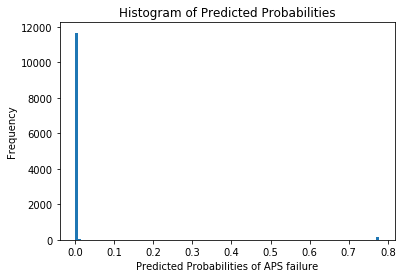

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#histogram of class distribution
plt.hist(y_pred_prob, bins=100)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities of APS failure")
plt.ylabel("Frequency")
plt.show()